#✏️ Diferença entre predição e inferência

Vamos falar agora das 7 premissas da regressão linear — que são especialmente relevantes quando você quer interpretar estatisticamente os resultados (como p-valores, testes de hipótese, ICs, F-statistic etc.).

Se o objetivo é predição, algumas dessas premissas podem ser flexibilizadas. Mas, **para inferência, elas são fundamentais.** Só é possível usar a regressão para fazer inferência se algumas premissas forem cumpridas. Tais premissas são discutidas em sequência.

📖 Referências

https://periodicos.ufpe.br/revistas/politicahoje/article/view/3808/31622

#🔎 Linearidade

A relação entre as variáveis independentes (X) e a variável dependente (Y) deve ser linear. Isso quer dizer que a mudança em X gera uma mudança proporcional em Y. A equação assume a forma:

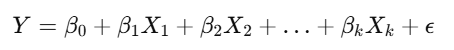

 Se essa suposição for violada, o modelo OLS pode produzir coeficientes enviesados e previsões imprecisas. Gráficos de dispersão entre Y e cada X ajudam a identificar isso.

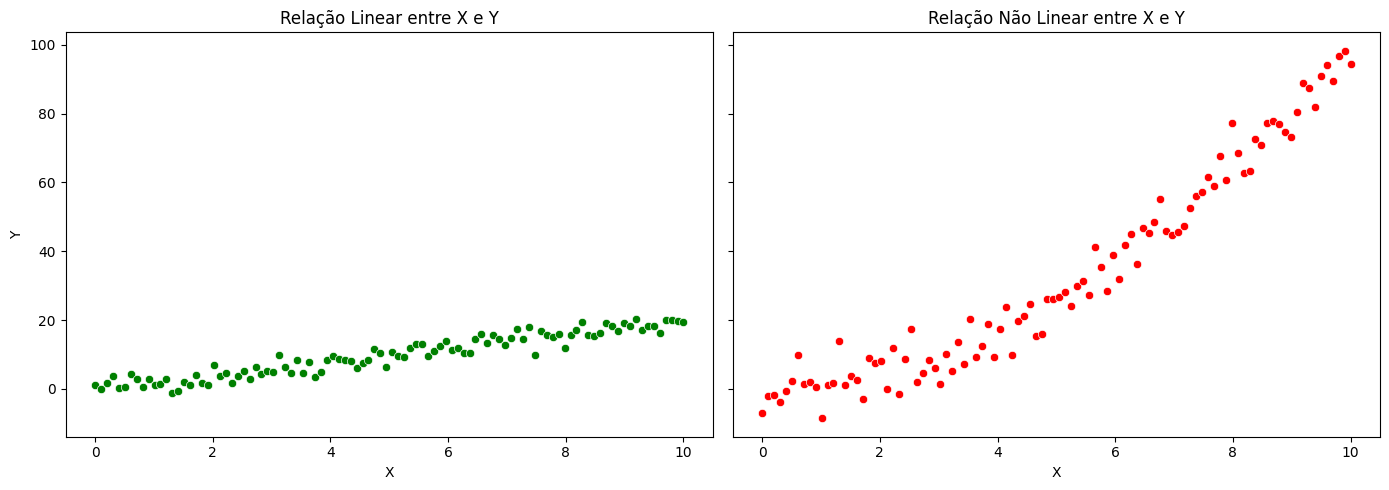

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Gerando dados para duas situações: linearidade e não linearidade

# Dados simulados
np.random.seed(42)
X = np.linspace(0, 10, 100)

# Linear: Y = 2X + erro
Y_linear = 2 * X + np.random.normal(scale=2, size=X.shape)

# Não linear: Y = X^2 + erro
Y_nonlinear = X**2 + np.random.normal(scale=5, size=X.shape)

# Criando os gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

# Gráfico linear
sns.scatterplot(x=X, y=Y_linear, ax=axs[0], color='green')
axs[0].set_title("Relação Linear entre X e Y")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# Gráfico não linear
sns.scatterplot(x=X, y=Y_nonlinear, ax=axs[1], color='red')
axs[1].set_title("Relação Não Linear entre X e Y")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

plt.tight_layout()
plt.show()


Aqui estão dois exemplos gráficos que ilustram a premissa da linearidade em modelos de regressão:

📈 Gráfico à esquerda (verde): mostra uma relação linear entre X e Y. A nuvem de pontos segue um padrão retilíneo com alguma dispersão. Esse tipo de relação satisfaz a premissa da linearidade e é adequado para regressão linear.

❌ Gráfico à direita (vermelho): mostra uma relação não linear entre X e Y, com um padrão curvo (quadrático). Ajustar uma regressão linear nesse caso pode levar a estimativas enviesadas e previsões ruins.

# 📌 O termo de erro tem média zero

O erro aleatório (resíduo) deve ter média populacional zero. Isso garante que os resíduos não estejam sistematicamente acima ou abaixo da linha de regressão. Se essa premissa for violada, os coeficientes podem estar enviesados.



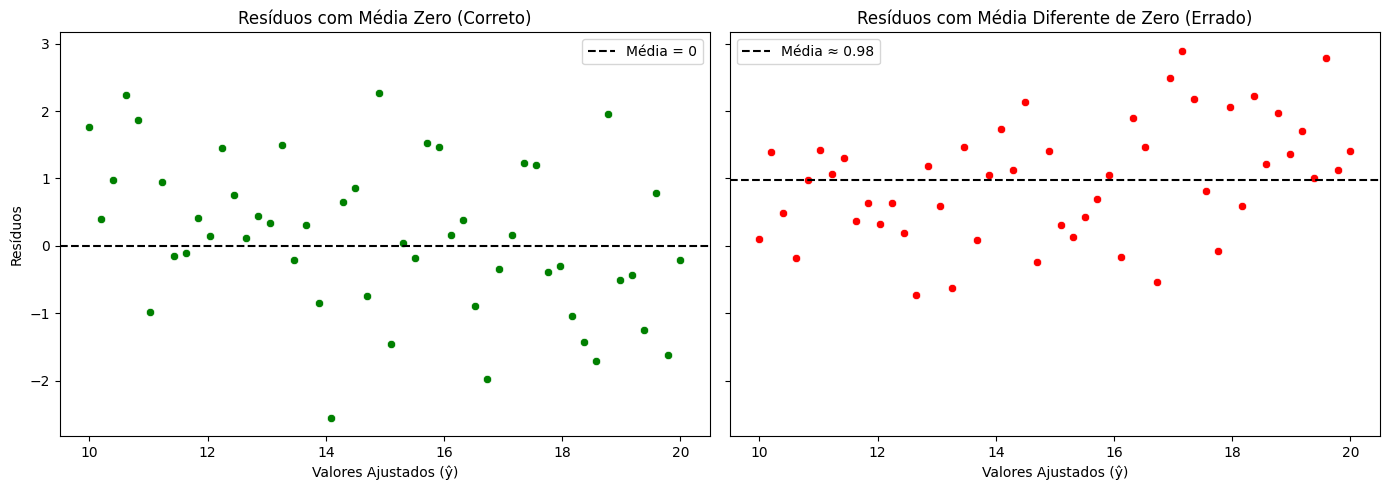

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulando valores ajustados (preditos)
np.random.seed(0)
y_hat = np.linspace(10, 20, 50)

# Resíduos com média zero (correto)
residuos_certos = np.random.normal(loc=0, scale=1, size=50)

# Resíduos com média diferente de zero (errado)
residuos_errados = np.random.normal(loc=1, scale=1, size=50)

# Plotando
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Gráfico correto
sns.scatterplot(x=y_hat, y=residuos_certos, ax=axs[0], color='green')
axs[0].axhline(0, color='black', linestyle='--', label='Média = 0')
axs[0].set_title("Resíduos com Média Zero (Correto)")
axs[0].set_xlabel("Valores Ajustados (ŷ)")
axs[0].set_ylabel("Resíduos")
axs[0].legend()

# Gráfico incorreto
sns.scatterplot(x=y_hat, y=residuos_errados, ax=axs[1], color='red')
media_errada = np.mean(residuos_errados)
axs[1].axhline(media_errada, color='black', linestyle='--', label=f"Média ≈ {media_errada:.2f}")
axs[1].set_title("Resíduos com Média Diferente de Zero (Errado)")
axs[1].set_xlabel("Valores Ajustados (ŷ)")
axs[1].legend()

plt.tight_layout()
plt.show()



No primeiro gráfico, os resíduos (erros) estão distribuídos em torno da linha vermelha (nível 0). Isso indica que os erros têm média aproximadamente igual a zero, o que é uma das suposições fundamentais da regressão linear.

No último gráfico, a maior parte dos resíduos está acima da linha zero, o que indica que a média dos erros não é zero. Isso pode levar a viés nos coeficientes, interpretações erradas sobre o modelo, e invalidação dos testes estatísticos (como p-valores).

**Exemplo Mestrado**

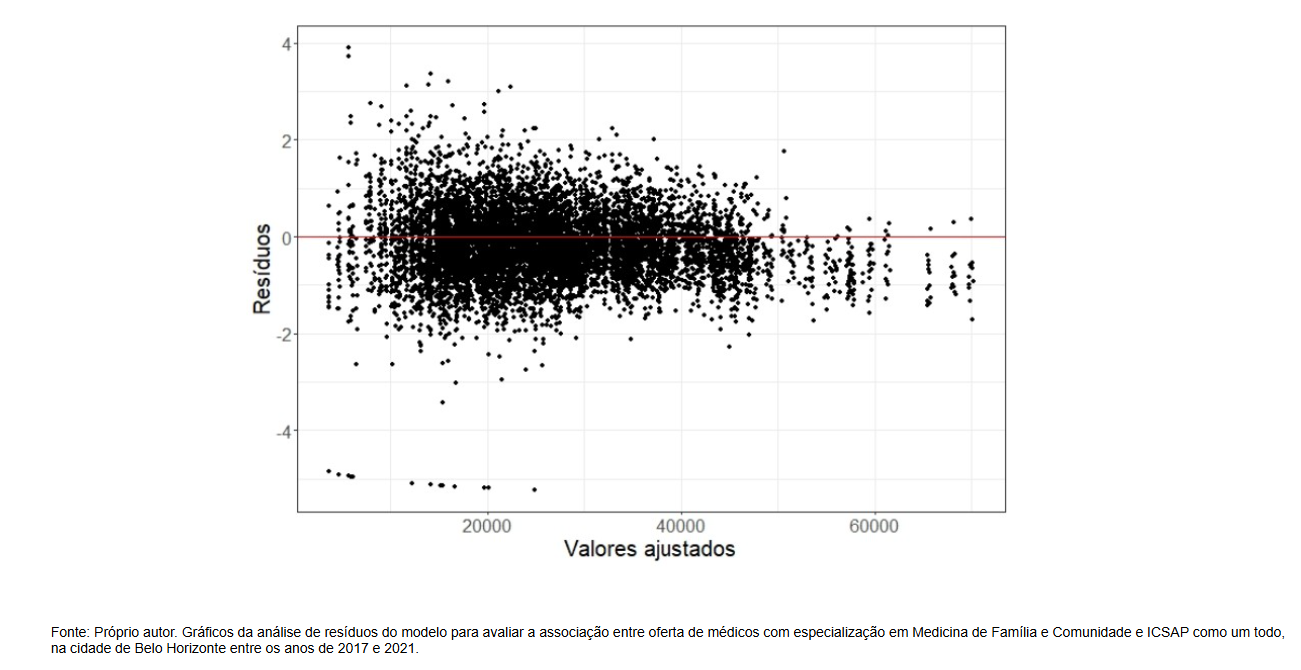

# 💡 As variáveis independentes são não correlacionadas com o erro

Esse é o princípio da exogeneidade. Se X está correlacionada com o erro, há endogeneidade, e o modelo atribui incorretamente parte da variação de Y a X, quando na verdade deveria ser ao erro. Isso gera viés nos coeficientes estimados, comprometendo qualquer inferência (como p-valores) e podendo levar a interpretações erradas.

Como diagnosticar? Faça um gráfico dos resíduos por cada variável. O gráfico deve exibir boa aleatoriedade. Se houver padrão, há problema.

✔️ O que queremos ver:

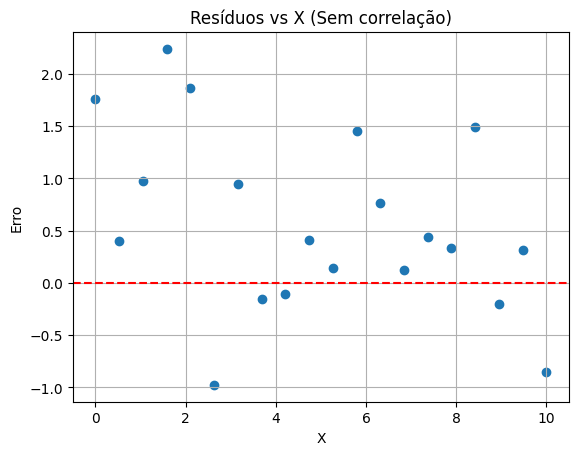

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# X e erro não correlacionados
np.random.seed(0)
X = np.linspace(0, 10, 20)
erro = np.random.normal(0, 1, 20)

plt.scatter(X, erro)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs X (Sem correlação)')
plt.xlabel('X')
plt.ylabel('Erro')
plt.grid(True)
plt.show()


❌ O que não queremos ver: Um padrão claro (ex: crescente, curvo, em cone...), indicando que o erro ainda “sabe” de algo sobre X.

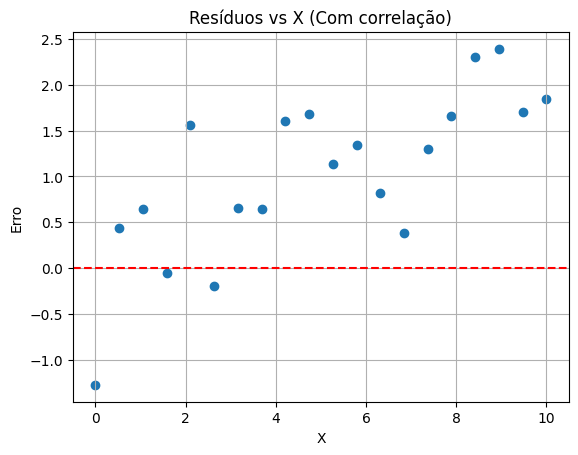

In [ ]:
# X e erro correlacionados
erro_viés = 0.2 * X + np.random.normal(0, 0.5, 20)

plt.scatter(X, erro_viés)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Resíduos vs X (Com correlação)')
plt.xlabel('X')
plt.ylabel('Erro')
plt.grid(True)
plt.show()


Se for identificado esse problema, as soluções podem incluir:
* Variáveis instrumentais (IV)
* Modelos mais robustos (2SLS, GMM)
* Análise de causalidade mais profunda

**Teste de Durbin-Wu-Hausman (DWH)**

O teste de Durbin-Wu-Hausman (DWH) é um dos testes mais importantes para avaliar se uma variável explicativa em um modelo de regressão linear é endógena — ou seja, se está correlacionada com o erro do modelo.

Quando essa correlação existe, os coeficientes estimados por regressão linear comum (OLS) são enviesados e inconsistentes. O DWH testa se isso acontece.

* H₀ (nula): X é exógena → OLS é válido e eficiente
* H₁ (alternativa): X é endógena → OLS é inválido, devemos usar IV/2SLS

Etapa 1 – Regressão auxiliar
Regredir a variável suspeita de ser endógena (X) sobre os instrumentos (Z) e demais variáveis exógenas. Obtemos os resíduos dessa regressão.

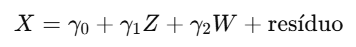

Etapa 2 – Regressão aumentada
Regredir Y sobre X, W, e os resíduos obtidos no passo anterior:

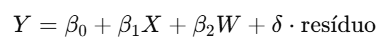

* Se o coeficiente de resíduo for significativo (p < 0.05) → X é endógena.
* Se não for significativo → X é exógena e o modelo OLS está OK.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Simulando dados com possível endogeneidade
np.random.seed(42)
n = 300

# Instrumento Z e variável exógena W
Z = np.random.normal(size=n)
W = np.random.normal(size=n)

# Variável endógena X influenciada por Z e ruído
X = 0.7 * Z + 0.3 * W + np.random.normal(size=n)

# Erro correlacionado com X (endogeneidade)
error = 0.5 * X + np.random.normal(size=n)

# Variável dependente Y
Y = 1.2 + 2.0 * X + 1.0 * W + error

# Criar DataFrame
df = pd.DataFrame({'Y': Y, 'X': X, 'Z': Z, 'W': W})

# Etapa 1: Regressão auxiliar (X ~ Z + W)
stage1 = sm.OLS(df['X'], sm.add_constant(df[['Z', 'W']])).fit()
df['residuals_stage1'] = stage1.resid

# Etapa 2: Regressão aumentada (Y ~ X + W + residuals)
stage2 = sm.OLS(df['Y'], sm.add_constant(df[['X', 'W', 'residuals_stage1']])).fit()

stage2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sun, 20 Apr 2025   Prob (F-statistic):          9.82e-160
Time:                        22:25:08   Log-Likelihood:                -427.08
No. Observations:                 300   AIC:                             862.2
Df Residuals:                     296   BIC:                             877.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2893      0.059     21.920      0.000       1.174       1.405
X                    2.6031      0.090     28.899      0.000       2.426       2.780
W                    0.9243      0.065     14.328      0.000       0.797       1.051
residuals_stage1    -0.1113      0.108     -1.035      0.301      -0.323       0.100
==============================================================================
Omnibus:                        2.085   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                2.051
Skew:                          -0.201   Prob(JB):                        0.359
Kurtosis:                       2.955   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O p-valor para residuals_stage1 é 0.301, ou seja: Maior que 0.05 → não há evidência de endogeneidade. Isso significa que a variável X pode ser tratada como exógena, e a regressão OLS está apropriada. Portanto, não há necessidade de usar IV/2SLS nesse caso

OBS: Para entender mais sobre variável instrumental, acesse: https://medium.com/@renata-biaggi/parte-2-causalidade-vari%C3%A1vel-instrumental-iv-e-c%C3%B3digo-em-python-5a480b86529e

#✒️ As observações do termo de erro não são correlacionadas entre si (Ausência de autocorrelação)

A premissa diz que o erro de uma observação (ε₁) não deve prever o erro da próxima (ε₂). Isso é especialmente importante em séries temporais. Quando há padrão sequencial nos resíduos, dizemos que existe autocorrelação (positiva ou negativa).

O gráfico de resíduos mostra um padrão cíclico (subindo e descendo ao longo do tempo), o que indica autocorrelação positiva — ou seja, quando o erro é positivo, o seguinte tende também a ser positivo.

💡 Diagnóstico visual:
* Gráfico de resíduos vs ordem de observação
* Forma de onda, padrão repetido → problema

📌 Solução:
* Incluir variáveis que expliquem esse padrão (ex: tendência, sazonalidade)
* Utilizar modelos apropriados como regressões com erros AR (auto-regressivos)

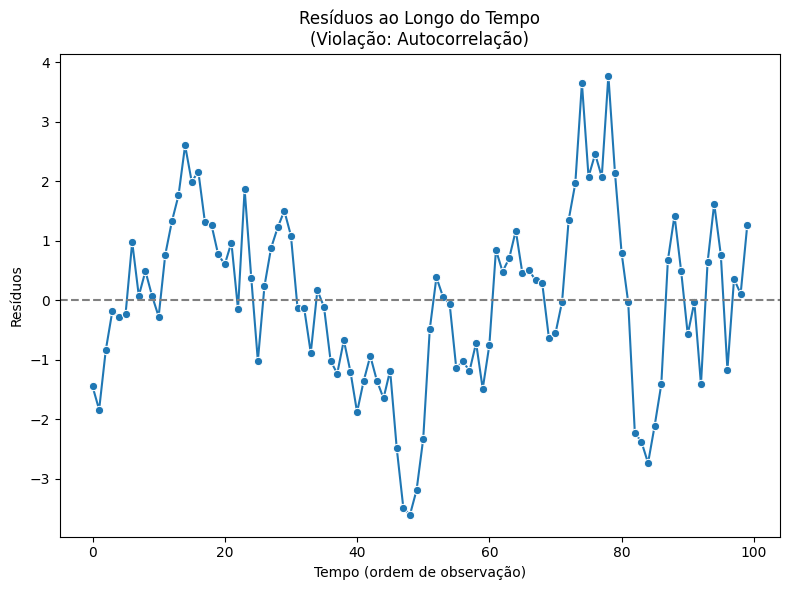

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Dados simulando autocorrelação dos erros
n = 100
time = np.arange(n)
e_autocorrelated = np.zeros(n)
rho = 0.8  # autocorrelação forte
e_autocorrelated[0] = np.random.normal()
for t in range(1, n):
    e_autocorrelated[t] = rho * e_autocorrelated[t-1] + np.random.normal()

Y_auto = 5 + 0.3 * time + e_autocorrelated
X_auto = sm.add_constant(time)
model_auto = sm.OLS(Y_auto, X_auto).fit()
residuals_auto = model_auto.resid

# Gráfico de autocorrelação dos resíduos
plt.figure(figsize=(8, 6))
sns.lineplot(x=time, y=residuals_auto, marker="o")
plt.axhline(0, linestyle='--', color='gray')
plt.title('Resíduos ao Longo do Tempo\n(Violação: Autocorrelação)')
plt.xlabel('Tempo (ordem de observação)')
plt.ylabel('Resíduos')
plt.tight_layout()
plt.show()

Gráfico: Resíduos ao longo do tempo (ordem das observações). Esse gráfico mostra que os resíduos seguem um padrão temporal – valores positivos são seguidos de positivos, e negativos de negativos. O que deveria ocorrer: os resíduos devem variar aleatoriamente ao longo do tempo, sem padrão aparente. O que vemos aqui: um comportamento cíclico — indicando autocorrelação (os erros estão correlacionados com seus valores anteriores). A autocorrelação costuma ocorrer em séries temporais (ex: vendas, temperatura), onde eventos passados influenciam os futuros. Isso infringe a suposição de independência dos erros e pode distorcer as inferências.

**Teste de Durbin-Watson**

O teste de Durbin-Watson é um teste estatístico usado para detectar autocorrelação nos resíduos de uma regressão linear. Ele é especialmente importante quando você está trabalhando com dados ordenados no tempo (séries temporais).

Ele testa se os resíduos consecutivos estão correlacionados:
* Se um erro positivo tende a ser seguido por outro positivo, ou
* Se um erro negativo tende a ser seguido por outro negativo.



O resultado do teste é um número entre 0 e 4:
* ≈ 2: Sem autocorrelação (o ideal)
* < 2: Autocorrelação positiva
& > 2: Autocorrelação negativa
* ≈ 0 ou ≈ 4: Forte autocorrelação (positiva ou negativa)

In [ ]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model_auto.resid)
print(dw)

0.40775797908590666


A autocorrelação dos resíduos viola a suposição de independência dos erros no modelo de regressão. Isso pode:
* Inflar o R² artificialmente,
* Subestimar os erros padrão dos coeficientes,
* Tornar os testes 𝑡 e 𝐹 invalidados.

#🖌️ O termo de erro tem variância constante (Homoscedasticidade)

Homoscedasticidade significa que os erros (resíduos) da regressão têm variância constante ao longo de todos os valores da variável independente (ou dos valores ajustados). Em outras palavras: os resíduos não aumentam nem diminuem sistematicamente conforme X ou Ŷ muda.

Quando essa premissa é violada, ocorre heterocedasticidade — ou seja, a variância dos erros muda ao longo do domínio de X.

Isso pode gerar: Estimativas corretas dos coeficientes, mas
* Erros padrão, p-valores e intervalos de confiança incorretos
* Testes t e F não confiáveis

**Diagnóstico Visual**

Gráfico de resíduos vs. valores ajustados (resid vs ŷ), em que forma de cone ou funil indica heterocedasticidade


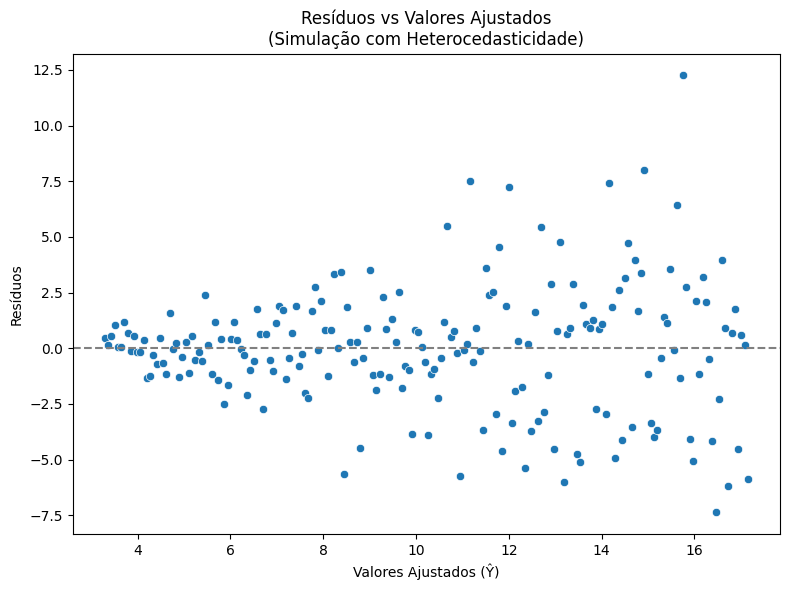

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Gerando dados com heterocedasticidade
np.random.seed(42)
X = np.linspace(1, 10, 200)
epsilon = np.random.normal(loc=0, scale=0.5 * X, size=len(X))  # erro com variância crescente
Y = 2 + 1.5 * X + epsilon

# Ajuste do modelo OLS
X_const = sm.add_constant(X)
modelo = sm.OLS(Y, X_const).fit()
residuos = modelo.resid
ajustados = modelo.fittedvalues

# Gráfico de resíduos vs valores ajustados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ajustados, y=residuos)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Resíduos vs Valores Ajustados\n(Simulação com Heterocedasticidade)")
plt.xlabel("Valores Ajustados (Ŷ)")
plt.ylabel("Resíduos")
plt.tight_layout()
plt.show()



O gráfico mostra um padrão de dispersão que aumenta com os valores ajustados (Ŷ). Isso é o clássico formato de funil, indicando que a variância dos erros não é constante → temos heterocedasticidade.

**Diagnóstico por Teste formal**:

O teste de Breusch-Pagan (BP) é um dos testes mais clássicos e amplamente utilizados para detectar heterocedasticidade em modelos de regressão linear. Objetivo do teste é verificar se os resíduos da regressão possuem variância constante (homoscedasticidade) ou se a variância dos erros depende de X (heterocedasticidade).

* H₀ (hipótese nula): Os erros têm variância constante → homoscedasticidade
* H₁ (alternativa): A variância dos erros depende das variáveis explicativas → heterocedasticidade

In [ ]:
# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_const)

# Resultados do teste
bp_resultado = {
    "Estatística LM": bp_test[0],
    "p-valor": bp_test[1],
    "Estatística F": bp_test[2],
    "p-valor F": bp_test[3]
}

bp_resultado

{'Estatística LM': np.float64(27.789701222823826),
 'p-valor': np.float64(1.3524413572896026e-07),
 'Estatística F': np.float64(31.95140407507597),
 'p-valor F': np.float64(5.45709128330778e-08)}

Interpretação dos resultados sobre p-valor	Conclusão
* p > 0.05: Não rejeita H₀ → homoscedasticidade (ok)
* p < 0.05: Rejeita H₀ → heterocedasticidade detectada

#📝 Nenhuma variável independente é uma função linear de outras variáveis explicativas (sem multicolinearidade)

Multicolinearidade ocorre quando duas ou mais variáveis independentes estão altamente correlacionadas entre si. Isso compromete a capacidade do modelo de regressão linear de isolar o efeito individual de cada variável sobre a variável dependente (Y).



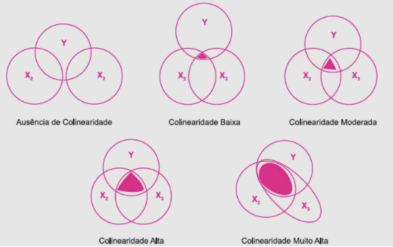

Por que isso é um problema?
* Dificulta a interpretação dos coeficientes.
* Os valores estimados (os betas) se tornam instáveis.
* Pequenas mudanças nos dados podem gerar grandes mudanças nos coeficientes.
* O p-valor aumenta, mesmo que a variável tenha efeito real sobre Y.
* O poder estatístico da análise é reduzido.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Gerando dados artificiais com multicolinearidade
np.random.seed(42)
n = 100

altura = np.random.normal(1.70, 0.1, n)  # altura em metros
peso = np.random.normal(70, 10, n)       # peso em kg
imc = peso / (altura ** 2)               # fórmula do IMC
gordura = imc * 0.5 + np.random.normal(0, 1, n)  # gordura simulada a partir do IMC

# Criar o DataFrame
df = pd.DataFrame({
    'Peso': peso,
    'Altura': altura,
    'IMC': imc,
    'Gordura': gordura
})

Como detectar multicolinearidade?

1. **Correlação entre variáveis independentes**: Você pode usar uma matriz de correlação para verificar se há alta correlação entre duas variáveis (|r| > 0.8).

<Axes: >

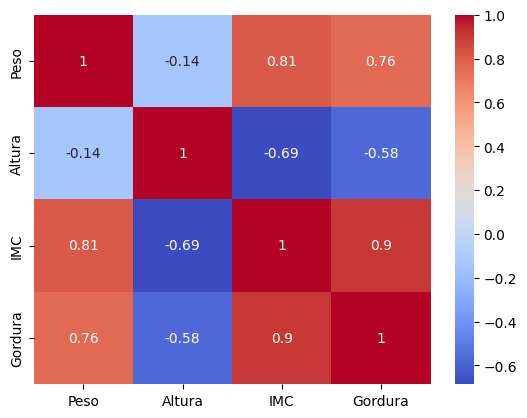

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

2. **VIF (Variance Inflation Factor) – Fator de Inflação da Variância**

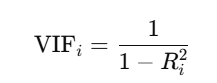

Onde 𝑅𝑖2 é o R² de uma regressão da variável 𝑋𝑖 contra todas as outras variáveis independentes.

* VIF = 1: sem correlação.
* VIF entre 1 e 5: moderado, ok.
* VIF > 5: multicolinearidade preocupante.
* VIF > 10: crítica!

In [ ]:
# Variáveis independentes
X = df[['Peso', 'Altura', 'IMC']]
X = add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variável          VIF
0    const  9313.515761
1     Peso    41.032698
2   Altura    27.247870
3      IMC    76.081773


IMC é derivado diretamente de Peso e Altura, portanto esperamos VIF alto para essas variáveis. O VIF ajuda a identificar quais variáveis são redundantes ou altamente colineares com as outras.

**Como Tratar a Multicolinearidade**

1. Remover Variáveis Correlacionadas: Se duas variáveis estão altamente correlacionadas (ex: peso e IMC), considere remover uma delas. Teste novamente VIF após isso.

2. Combinar Variáveis em um Índice: Se faz sentido teórico, você pode criar uma nova variável que combine outras.

3. Transformar as Variáveis (PCA ou Fatores): Use Análise de Componentes Principais (PCA) para gerar variáveis ortogonais (sem correlação).

4. Regularização (Ridge ou Lasso): Esses métodos penalizam coeficientes altos e ajudam a reduzir com multicolinearidade. Ridge: mantém todas as variáveis, mas reduz os coeficientes. Lasso: pode zerar coeficientes e remover variáveis. Saiba mais sobre em: https://medium.com/turing-talks/turing-talks-20-regress%C3%A3o-de-ridge-e-lasso-a0fc467b5629

5. Apenas Interpretar com Cautela: Se o foco for predição e o modelo tiver bom desempenho, a multicolinearidade pode ser tolerada. O problema é mais grave quando você deseja interpretação estatística dos coeficientes.

#🔨 O termo de erro é normalmente distribuído

Esse pressuposto diz que os resíduos (diferença entre valores observados e previstos) do modelo deveriam seguir uma distribuição normal.

**📉 O que acontece se os erros não forem normais?**
* Valores-p podem estar incorretos
* Intervalos de confiança podem ser muito estreitos ou largos
* As estimativas dos coeficientes ainda são válidas
* O modelo ainda pode prever relativamente bem (dependendo do caso)

**Como verificar a normalidade dos resíduos?**

* Gráfico de probabilidade normal (QQ plot) → se os resíduos estiverem alinhados com a linha, a normalidade é plausível.
* Teste de Shapiro-Wilk, Anderson-Darling ou Kolmogorov-Smirnov (mas cuidado com amostras grandes — qualquer pequeno desvio vira “significativo”)

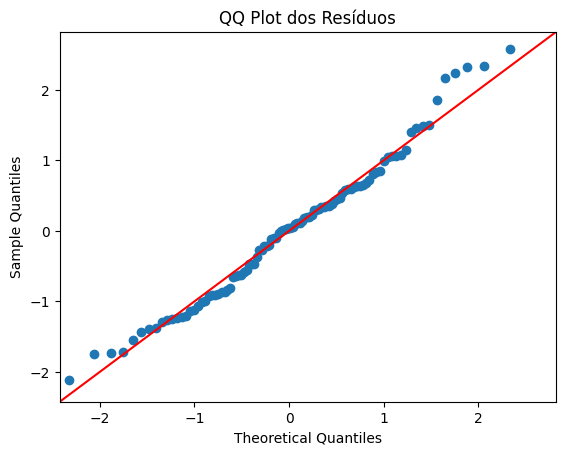

Shapiro-Wilk: Estatística=0.981, p-valor=0.165
Kolmogorov-Smirnov: Estatística=0.061, p-valor=0.831


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# 🔢 Simulando dados
np.random.seed(42)
X = np.random.normal(50, 10, 100)
Y = 2.5 * X + np.random.normal(0, 10, 100)  # Regressão linear com erro normal

# Adiciona constante para o modelo
X_const = sm.add_constant(X)

# 📉 Ajusta o modelo
modelo = sm.OLS(Y, X_const).fit()

# Obtém resíduos
residuos = modelo.resid

# 📊 QQ plot para verificar normalidade
sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot dos Resíduos')
plt.show()

# 🧪 Teste de Shapiro-Wilk
stat, p = stats.shapiro(residuos)
print(f"Shapiro-Wilk: Estatística={stat:.3f}, p-valor={p:.3f}")

# 🧪 Teste de Kolmogorov-Smirnov (com média e std da amostra)
ks_stat, ks_p = stats.kstest((residuos - np.mean(residuos)) / np.std(residuos), 'norm')
print(f"Kolmogorov-Smirnov: Estatística={ks_stat:.3f}, p-valor={ks_p:.3f}")

**Os resíduos podem ser considerados normalmente distribuídos.**

- QQ Plot: Os pontos seguem bem a linha vermelha, com pequenas desvios nas caudas. Isso sugere que a normalidade é plausível. Um QQ Plot assim geralmente é considerado adequado.



* Shapiro-Wilk Estatística: 0.981, p-valor = 0.165. Interpretação: p-valor > 0.05 → não rejeitamos a hipótese nula de normalidade.

* Kolmogorov-Smirnov: Estatística: 0.061, p-valor = 0.831. Interpretação: também p-valor > 0.05 → normalidade plausível.

# 🛠️ Alternativas se os pressupostos não forem atendidos

Caso os pressupostos não sejam atendidos, é possível lançar mão de algumas estratégias para contornar isso, a depender de tal ou qual a premissa foi violada.

**Linearidade**

- Transformações dos dados (ex: log)
- Variáveis dummies
- Modelos não lineares
- Modelos aditivos generalizados

**Independência dos erros**

- Modelos de séries temporais (ex: ARIMA)
- Modelos mistos ou com efeitos aleatórios

**Homoscedasticidade**

- Transformações dos dados (ex: log)
- Regressão robusta
- GLM com variância modelada (ex: família gamma)

**Normalidade dos erros**

- Bootstrapping
- Transformações
- GLM
- Modelos não paramétricos (ex: Regressão quantílica)

**Multicolinearidade**

- Remover variáveis conforme VIF
- PCA
- Regressão Ridge/Lasso